<a href="https://colab.research.google.com/github/Anshul007/PyTorch-for-deep-learning-in-a-day/blob/main/Daniel_Bourke_Lecture_03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer Vision Libraries
- `torchvision` - is a base library for computer vision.
- `torchvision.dataset`
- `torchvision.models`
- `torchvision.transforms`
- `torchvision.utils.data.Dataset`
- `torchvision.utils.data.Dataloader`

In [2]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.0+cu121
0.20.0+cu121


## 1. Getting a Dataset

fashionMNIST

In [3]:
# setup train data
train_data = datasets.FashionMNIST(
    root= "data", # where to in yout local
    train= True, # we wnat training version of the dataset.
    download= True, # do we want to download
    transform= torchvision.transforms.ToTensor(),
    target_transform = None) # How do we transform the label as well)

# same we have to do with the test data
test_data = datasets.FashionMNIST(
    root= "data",
    train= False,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform= None)

100%|██████████| 26.4M/26.4M [00:14<00:00, 1.84MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.28MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
images, labels = train_data[0]

In [7]:
labels

9

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# get the index of labels
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
# check the shape of the image
images.shape, labels

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing the random data

Image shape : torch.Size([1, 28, 28])


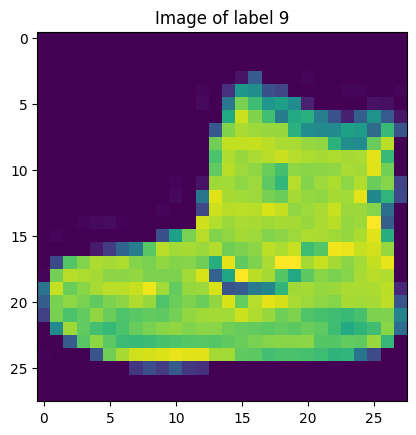

In [11]:
import matplotlib.pyplot as plt

image, label = train_data[0]

print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"Image of label {label}")
plt.show()

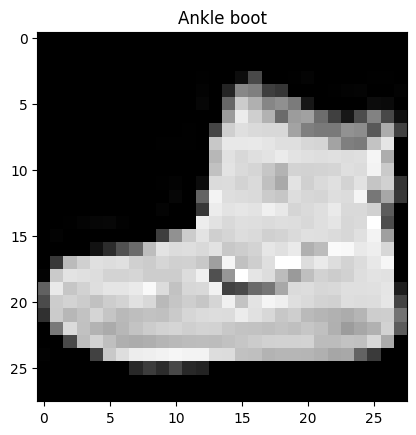

In [12]:
# we can change it to a gray scale
plt.imshow(image.squeeze(), cmap= "gray")
plt.title(class_names[label])
plt.show()

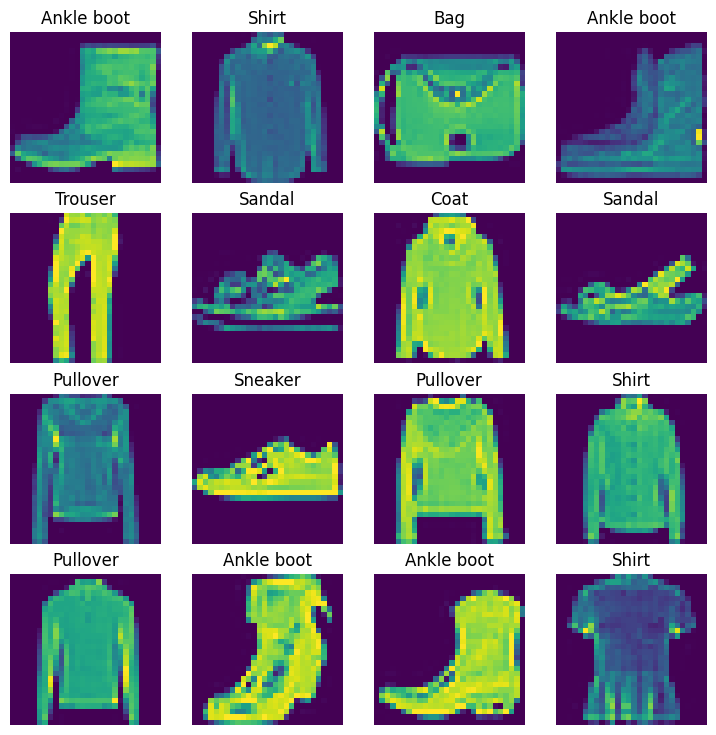

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize= (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size=[1]).item()
  # get the image and label
  image, label = train_data[random_idx]
  # plotting
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis(False)

# 2. Prepair Data Loader

In [14]:
from torch.utils.data import DataLoader

In [15]:
train_dataloader = DataLoader(dataset= train_data,
                              batch_size=32,
                              shuffle= True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size= 32,
                             shuffle= False) # it is good to predict as is it in testing

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dc4db18cee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dc4db18d540>)

In [16]:
# let's check out what we created
len(train_dataloader), len(test_dataloader) # these are the number of batches and each batch contains 32 images.

(1875, 313)

> What's inside a DataLoader

In [17]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

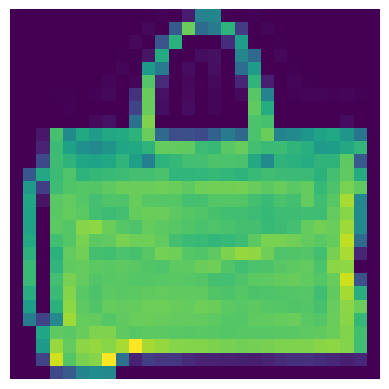

In [18]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size= [1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze())
plt.axis(False)
plt.show()

## Model 0: Build a baseline model

> The idea is to build a base line model and add complexity later.

In [19]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a simple single
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening {x.shape}")
print(f"Shape after flattening {output.shape}")

Shape before flattening torch.Size([1, 28, 28])
Shape after flattening torch.Size([1, 784])


In [20]:
output.shape, 28*28

(torch.Size([1, 784]), 784)

In [21]:
from torch import nn

In [22]:
class fashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # converting into one single vecator space
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.ReLU(), # skipping as of now
        nn.Linear(in_features= hidden_units, out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# Setup a model with input parameters
model_0 = fashionMNISTModelV0(
    input_shape= 28*28,
    hidden_units= 10,
    output_shape = len(class_names)
)
model_0

fashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
# checking with dummy data
dummy_x = torch.rand([1,1,28,28]) # [batch, color channel, hieght_pixel, weight_pixel]
model_0(dummy_x)

tensor([[ 0.0806,  0.1593,  0.1565, -0.0215,  0.4741,  0.1441,  0.1634,  0.3834,
         -0.1097, -0.1413]], grad_fn=<AddmmBackward0>)

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup Loss, Optimizer and Evaluation Metrics

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [27]:
# import accuracy metrics
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fnct = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.1)

## 3.2 Create a function to Time-out Experiments

> Basically we want to track 2 things.
- Model's Performance (loss & Accuracy Function)
- How fast it runs

In [28]:
from timeit import default_timer

def  print_train_time(start: float,
                      end: float,
                      device: torch.device = None):
  ''' print difference between start and end time '''
  total_time = end - start
  print(f"Train time on {device} : {total_time: .3f} seconds")
  return total_time

In [29]:
start_time = default_timer()
# some code
end_time = default_timer()

print_train_time(start_time, end_time)

Train time on None :  0.000 seconds


9.033399999225367e-05

## 3.3 Creating a traing loop and training a model on batches of data.

-----
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate training loss **per batch**.
3. Loop through testing batches, perform testing steps calculate testing loss **per batch**.
4. print out what's happening

In [30]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed
torch.manual_seed(42)
train_time_start_on_cpu = default_timer()

# set the number of epochs
epochs = 3

# create a training & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_losses = 0

  # Add a loop to loop through the training batch
  for batch, (train_image, train_label) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    train_logits = model_0(train_image)

    # 2. loss & Optimizer
    train_loss = loss_fnct(train_logits, train_label)
    train_losses += train_loss

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. loss backward
    train_loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # printout what's happening
    if batch % 200 == 0:
      # looked at how many sample
      print(f"Looked at {batch * len(train_image)}/{len(train_dataloader.dataset)} samples")

  # divide total train loss by length of train_dataloader
  train_losses /= len(train_dataloader)

  ### Testing
  test_losses, test_accuracies = 0,0
  model_0.eval()
  with torch.inference_mode():
    for test_image, test_label in test_dataloader:
      # 1. Forward pass
      test_logits = model_0(test_image)

      # 2. caculate the loss
      test_losses += loss_fnct(test_logits, test_label)

      # 3. calculate accuracy
      test_accuracies += accuracy_fn(y_true= test_label, y_pred= test_logits.argmax(dim=1))

    # calculate test loss average per batch
    test_losses /= len(test_dataloader)

    # calculate test accuracy average per batch
    test_accuracies /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_losses:.5f} | Test loss: {test_losses:.5f} | Test acc: {test_accuracies:.2f}%\n")

train_time_end_on_cpu = default_timer()
total_train_time_0 = print_train_time(start= train_time_start_on_cpu,
                                      end= train_time_end_on_cpu,
                                      device= str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 0.64607 | Test loss: 0.53855 | Test acc: 80.76%

Epoch: 1
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 0.48094 | Test loss: 0.49390 | Test acc: 82.46%

Epoch: 2
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked

## 4. Make predictions and get results from model

In [31]:
# setup device-agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [32]:
next(model_0.parameters()).device

device(type='cpu')

In [33]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fnct: torch.nn.Module,
              accuracy_fnct):
  '''Return a dictonary containing the results of model predicting on data_loader'''
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for test_image, test_label in tqdm(data_loader):
      # moving data to GPU
      test_image, test_label = test_image.to(device), test_label.to(device)
      # Make Prediction
      test_logits = model(test_image)

      # Accumulate the loss and accuracy
      loss += loss_fnct(test_logits, test_label)
      acc += accuracy_fnct(test_label, test_logits.argmax(dim=1))

    # Average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # This only works when model is being created with class
          "model_loss": loss.item(), # because it is throwing object
          "model_acc": acc}


### calculate mode_0 on newly. created function
model_0_results = eval_model(model= model_0.to(device),
                     data_loader= test_dataloader,
                     loss_fnct= loss_fnct,
                     accuracy_fnct= accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionMNISTModelV0',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

# Set-up some device agnostic code for experiments

In [34]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [35]:
torch.cuda.is_available()

False

In [36]:
# Create a model with non-linear and linear layers
class fashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.non_linear_layer = nn.Sequential(
        nn.Flatten(), # for converting into single vector space
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.tensor):
    return self.non_linear_layer(x)

In [37]:
# create an instance of model_1
torch.manual_seed(42)

model_1 = fashionMNISTModelV1(input_shape= 28*28,
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device)

model_1

fashionMNISTModelV1(
  (non_linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Setup Loss, optimizer and Evaluation metrics

In [38]:
from helper_functions import accuracy_fn
loss_fnct = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr= 0.1)

### Create a function for training and testing loop

In [39]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fnct: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  ''' This is the insight the function '''

  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (image, label) in enumerate(dataloader):
      # Send data to GPU
      image, label = image.to(device), label.to(device)

      # 1. Forward pass
      image_logit = model(image)

      # 2. Calculate loss
      loss = loss_fnct(image_logit, label)
      train_loss += loss
      train_acc += accuracy_fn(y_true=label, y_pred=image_logit.argmax(dim=1)) # Go from logits -> pred labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fnct: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  ''' Here is the functions insight '''
  test_loss, test_acc = 0, 0

  # pu the model in eval mode
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    model.to(device)
    for image, label in dataloader:
      # Send data to GPU
      image, label = image.to(device), label.to(device)

      # 1. Forward pass
      image_logit = model(image)

      # 2. calculate the loss
      test_loss += loss_fnct(image_logit, label)
      test_acc += accuracy_fn(label, image_logit.argmax(dim=1))

    # adjust metrics to printout
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [40]:
# utilizing the train_step function and test_step function
torch.manual_seed(42)

from timeit import default_timer
train_time_start = default_timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch is {epoch}\n-------")
  train_step(model= model_1,
             dataloader= train_dataloader,
             loss_fnct= loss_fnct,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn)
  test_step(model= model_1,
             dataloader= test_dataloader,
             loss_fnct= loss_fnct,
             accuracy_fn= accuracy_fn)

train_time_end = default_timer()
total_train_time_1 = print_train_time(train_time_start, train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch is 0
-------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch is 1
-------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch is 2
-------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on None :  40.323 seconds


In [41]:
model_0_results # Result haven't improve

{'model_name': 'fashionMNISTModelV0',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

In [42]:
next(model_1.parameters()).device

device(type='cpu')

In [43]:
# Get model_1 result dictonary
model_1_results = eval_model(model= model_1,
                             data_loader= test_dataloader,
                             loss_fnct= loss_fnct,
                             accuracy_fnct= accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# Building a Convolution Neural Network (CNN)

> We are going to build CNN model for the Fashion MNIST data

----
playground for CNN : https://poloclub.github.io/cnn-explainer/



In [44]:
# Create a CNN
class fashionMNISTModelV2(nn.Module):
  ''' TinyVGG Model from CNN xplainer website'''
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    ### Block 1
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels= input_shape, out_channels= hidden_units, kernel_size= 3, stride= 1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,out_channels= hidden_units, kernel_size= 3, stride= 1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    ### Block 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    ### Output layer
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7, out_features= output_shape)
    )

  def forward(self, x):
    # #### just for shapes
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier_layer(x)
    # print(x.shape)

    return self.classifier_layer(self.conv_block_2(self.conv_block_1(x)))
    # return x # self.classifier_layer(self.conv_block_2(self.conv_block_1(x)))

In [45]:
image.shape, len(class_names)

(torch.Size([1, 28, 28]), 10)

In [46]:
torch.manual_seed(42)

model_2 = fashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

fashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

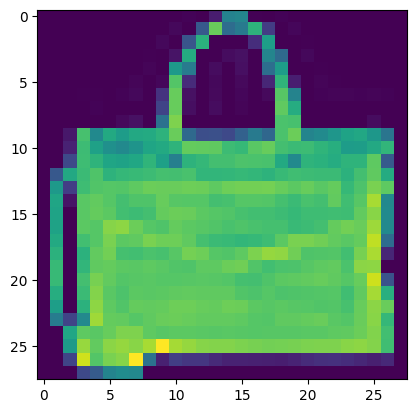

In [47]:
# let's just pass the single image to the Convolution model
plt.imshow(image.squeeze(dim=0))

In [48]:
# model_2(image) # since it is throwing error let's create random tensor

random_tensor = torch.randn(size=(1, 28, 28)).to(device)
random_tensor.shape

torch.Size([1, 28, 28])

In [49]:
model_2(random_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## Little bit inside `nn.Conv2d()`


In [50]:
# testing with sample data
torch.manual_seed(42)

sample_image = torch.randn(size= (32, 3, 64, 64))
test_image = sample_image[0]
test_image.shape, sample_image.shape

(torch.Size([3, 64, 64]), torch.Size([32, 3, 64, 64]))

- `kernel_size`: Size of the grid which we have to process and pass it to next layer as a pixel.
- `strid`      : The size of the step. skipping how many pixels when we move our kernel_grid from one place to next.
- `Padding`      : Adding pixels in rows and column in the existing layer only.


In [51]:
# create a single conv layer
single_conv_layer = nn.Conv2d(
    in_channels= 3,
    out_channels= 10,
    kernel_size= 3, # is equals to (3,3)
    stride= 1,
    padding=1
)
# pass the data to the convolutional layer
# conv_output = single_conv_layer(test_image) # This was not working in previous layers
conv_output = single_conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 64, 64])

## Little bit inside `nn.MaxPool2d()`

In [52]:
# 17:58:37

In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [54]:
# printing the shape of with or without squeezing the image
print(f"Test image with original shape {test_image.shape}")
print(f"Test image after unsqueezing {test_image.unsqueeze(dim=0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size= 2)

test_image_through_conv = single_conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv layer {test_image_through_conv.shape}")

test_image_through_max = max_pool_layer(test_image_through_conv)
print(f"Shape after going through nn.Conv2d layer nn.MaxPool2d --->  {test_image_through_max.shape}")

Test image with original shape torch.Size([3, 64, 64])
Test image after unsqueezing torch.Size([1, 3, 64, 64])
Shape after going through conv layer torch.Size([1, 10, 64, 64])
Shape after going through nn.Conv2d layer nn.MaxPool2d --->  torch.Size([1, 10, 32, 32])


> Now Let's see what's inside in MaxPool layer

In [55]:
torch.manual_seed(42)
# create a random tensor
random_tensor = torch.randn(size= (1,1,2,2))
print(f"Random Tensor {random_tensor}")

# create a MaxPool layer
max_pool_layer = nn.MaxPool2d(kernel_size= 2)
random_tendor_after_maxpool = max_pool_layer(random_tensor)
random_tendor_after_maxpool

Random Tensor tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])


tensor([[[[0.3367]]]])

## Set up a Loss function and optimizer

In [56]:
from helper_functions import accuracy_fn

loss_fnct = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(),
                                 lr= 0.1)

## Create a Train and Test Loop

here we are going to utilize the `trains_set` and `test_set`

In [57]:
from timeit import default_timer

In [58]:
torch.manual_seed(42)

epochs = 3
train_start_time = default_timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch is {epoch} \n --------")
  train_step(model= model_2,
             dataloader= train_dataloader,
             loss_fnct= loss_fnct,
             optimizer= optimizer,
             accuracy_fn = accuracy_fn,
             device= device)
  test_step(model= model_2,
            dataloader= test_dataloader,
            loss_fnct= loss_fnct,
            accuracy_fn = accuracy_fn,
            device= device)

train_end_time = default_timer()
total_train_time_2 = print_train_time(start= train_start_time, end= train_end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch is 0 
 --------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch is 1 
 --------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch is 2 
 --------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on None :  183.266 seconds


In [59]:
# get model_2 results
model_2_results= eval_model(model=model_2,
                           data_loader= test_dataloader,
                           loss_fnct= loss_fnct,
                           accuracy_fnct= accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

### Comparing the results of different model

In [60]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results["training_time"] = [total_train_time_0,
                                    total_train_time_1,
                                    total_train_time_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,fashionMNISTModelV0,0.457464,83.985623,36.149859
1,fashionMNISTModelV1,0.685001,75.019968,40.323280
2,fashionMNISTModelV2,0.327190,88.069089,183.266470


# Make and Evaluate random predictions with Best Model

In [63]:
def make_prediction(model: nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepair the sample
      sample = sample.unsqueeze(dim=0).to(device)

      #  forward pass
      sample_logits = model(sample)

      # get prediction probs
      sample_prob = torch.softmax(sample_logits.squeeze(), dim=0)

      # get the pred probs for further use case
      pred_probs.append(sample_prob) # it is in GPU (will see later)

  # stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [64]:
import random
random.seed(42)

In [71]:
# random.sample([1,2,3,4], k=3)


In [72]:
test_sample, test_label = [], []

for sample, label in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_label.append(label)

# view the sample and it's shape
test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

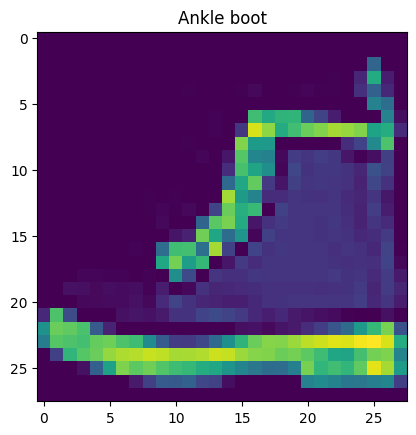

In [78]:
plt.imshow(test_sample[0].squeeze())
plt.title(class_names[test_label[0]])

In [81]:
pred_probs = make_prediction(model= model_2,
                data= test_sample)
pred_probs[:2] # These are the prediction probabilities

tensor([[1.2569e-04, 1.2576e-05, 1.3161e-04, 3.1947e-04, 4.3169e-05, 1.3441e-02,
         3.8095e-05, 1.4858e-02, 3.0994e-02, 9.4004e-01],
        [8.4049e-05, 5.8252e-06, 5.0293e-05, 4.0283e-05, 1.6245e-05, 2.1705e-03,
         1.5887e-05, 9.4965e-01, 2.8492e-03, 4.5119e-02]])

In [86]:
# convert prediction probabilities to classes
pred_classes = pred_probs.argmax(1)
pred_classes[:2]

tensor([9, 7])

In [93]:
# trying to understand, why Daniel has given 1 parameter in argmax
delme = torch.tensor([1.2569e-04, 1.2576e-05, 1.3161e-04, 3.1947e-04, 4.3169e-05, 1.3441e-02, 3.8095e-05, 1.4858e-02, 3.0994e-02, 9.4004e-01])
print(f"First {delme.shape}")
delme = delme.unsqueeze(dim=0)
print(f"Second {delme.shape}")
torch.argmax(delme, dim=0)

First torch.Size([10])
Second torch.Size([1, 10])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualization has created

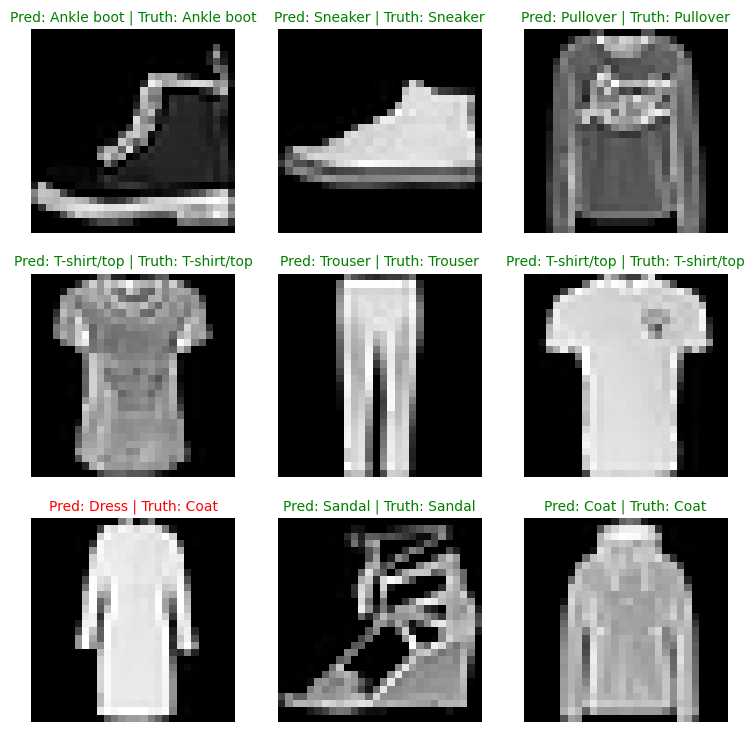

In [96]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_label[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Making a confusion Metrics for multi-class classification

In [102]:
!pip install torchmetrics
!pip install mlxtend

ERROR: Could not find a version that satisfies the requirement mlextend (from versions: none)
ERROR: No matching distribution found for mlextend


In [108]:
torchmetrics.__version__, mlxtend.__version__

('1.5.1', '0.23.1')

In [128]:
# Making predictions with trained data
test_image_pedictions, test_image_labels = [],[]

model_2.eval()
with torch.inference_mode():
  for test_image, test_label in tqdm(test_dataloader, desc="Making Predictions."):
    # send the data to target device
    test_image, test_label = test_image.to(device), test_label.to(device)
    # Do the forward pass
    test_image_logits = model_2(test_image)
    # turn logits --> predictions ---> prediction_labels
    test_image_pred = torch.softmax(test_image_logits, dim=0).argmax(dim=1)
    # take prediction back to cpu
    test_image_pedictions.append(test_image_pred.cpu())
    test_image_labels.append(test_label.cpu())

''' Still needs clarity on this
# convert list into tensor
torch.tensor(test_image_pedictions) '''

# concatenate list of predictions into tensor
test_image_tensor = torch.cat(test_image_pedictions) # this will convert list of tensors into single temsor
test_image_tensor

Making Predictions.:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [135]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [146]:
# Create raw confusion metrics
# confmat = ConfusionMatrix(num_classes= len(class_names))
confmat = ConfusionMatrix(task="multiclass",num_classes=10)
confmat_tensor = confmat(preds= test_image_tensor,
                         target= test_data.targets) # test_data.targets is also gives same
# printing confmat
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

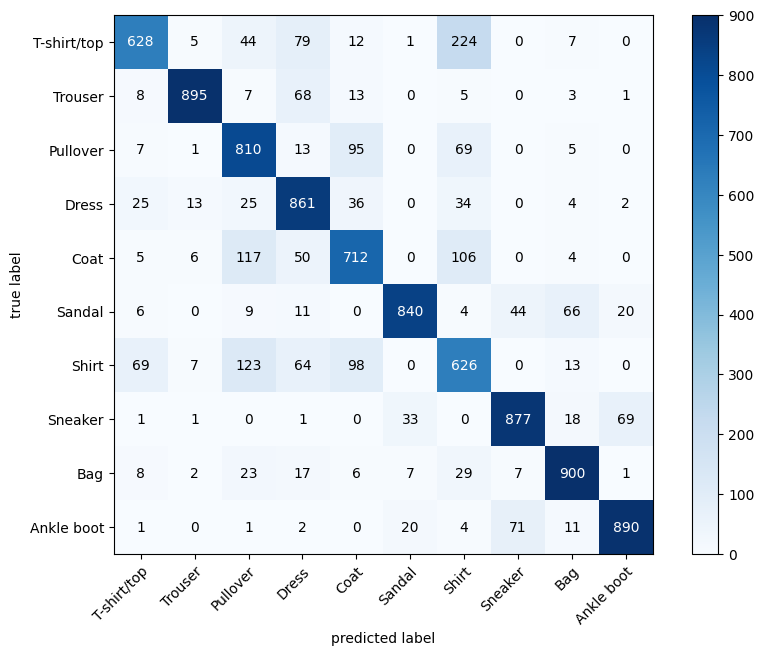

In [153]:
fig, ax = plot_confusion_matrix(conf_mat= np.array(confmat_tensor),
                                colorbar= True,
                                figsize= (10,7),
                                # cmap='summer',
                                class_names= class_names)
plt.show()

# Save/ Load the best performing model

In [157]:
from pathlib import Path

# Create a model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True,
                 exist_ok= True)

# Create a model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# MODEL_SAVE_PATH

# save the model state dict
print(f"Going to save model to {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(),
           f= MODEL_SAVE_PATH)

Going to save model to models/03_pytorch_computer_vision_model_2.pth
